In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# import test and train datasets
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# Prnting the dimensions of the train and test dataset.
print("Dimensions of train: {}".format(train.shape))
print("Dimensions of test: {}".format(test.shape))


Dimensions of train: (891, 12)
Dimensions of test: (418, 11)


In [3]:
# Question 1:
# Please show both the first few rows of the dataset.
# Using the .groupby() function show how many survived based off of the column Sex. Hint: You need to use both Sex and Survived.

# showing first few rows of both datasets using head()
test.head(3)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# 314 female survived and 577 male survived

by_gender = train.groupby('Sex')
by_gender['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [5]:
train.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [5]:
# Question 2:

# Please create a new subset of data and call it sub_data. The subset of data should consist of the columns Sex and Survived.
sub_data = train.loc[ : ,['Sex', 'Survived']]
sub_data

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1


In [6]:
# Show the data types of the columns Sex, Survived, and Pclass.

print("Data type of Sex:", train['Sex'].dtypes)
print("Data type of Survived:", train['Survived'].dtypes)
print("Data type of Pclass:", train['Pclass'].dtypes)

Data type of Sex: object
Data type of Survived: int64
Data type of Pclass: int64


Survived    0    1
Sex               
female     81  233
male      468  109


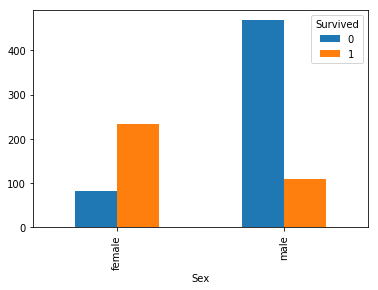

In [6]:
# Using the DataFrame.pivot_table() function pivot the values such that you return a bar plot and Sex is on the x-axis, and the number of survived is on the y-axis.
pivot = pd.pivot_table(train, values='PassengerId', index='Sex', columns='Survived', aggfunc='count')
print(pivot)

pivot.plot(kind='bar')
plt.show()

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


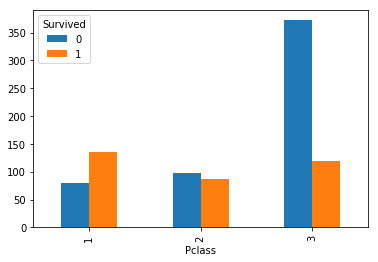

In [7]:
# Do the same for part 3, but set the x-axis to be Pclass, and the y-axis to be Survived
pivot = pd.pivot_table(train, values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')
print(pivot)

pivot.plot(kind='bar')
plt.show()

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Question 3:
# Using the .loc function create a new column of data called Senior:
     # Males older than 50 labeled as a text "Male Senior"
     # Femles older than 50 labled as a text "Female Senior"


train['Senior'] = None        
train.loc[((train['Sex'] == 'male')&(train['Age'] > 50.0)), 'Senior'] = 'Male Senior'
train.loc[((train['Sex'] == 'female')&(train['Age'] > 50.0)), 'Senior'] = 'Female Senior'


TypeError: '>' not supported between instances of 'str' and 'float'

In [28]:
train['Senior'] = None        
train.loc[((train['Sex'] == 'male')&(train['Embarked'] == 'S')), 'Senior'] = 'Male Senior'

train['Senior']

0      Male Senior
1             None
2             None
3             None
4      Male Senior
5             None
6             None
7      Male Senior
8             None
9             None
10            None
11            None
12     Male Senior
13     Male Senior
14            None
15            None
16            None
17     Male Senior
18            None
19            None
20     Male Senior
21     Male Senior
22            None
23     Male Senior
24            None
25            None
26            None
27     Male Senior
28            None
29     Male Senior
          ...     
861    Male Senior
862           None
863           None
864    Male Senior
865           None
866           None
867    Male Senior
868    Male Senior
869    Male Senior
870    Male Senior
871           None
872    Male Senior
873    Male Senior
874           None
875           None
876    Male Senior
877    Male Senior
878    Male Senior
879           None
880           None
881    Male Senior
882         

In [29]:
male_senior = (train['Sex' == 'male']) & (train['Age'] > 50.0)
female_senior = (train['Sex' == 'female']) & (train['Age'] > 50.0)
train['Senior'] = None        
train.loc[male_senior,'Senior'] = 'Male Senior'

KeyError: False

In [15]:
# Using the .loc function create a new column of data called Age Group:
     # Look at the Age column and find all passengers who are < 1 and labeled it as a text "Baby"
     # Any age between 1 and 10 label it as "Infant"
     # Any age between 10 and 20 as "Teenager"
     # Any age bove 20 as "Adult"
        
train['Age Group'] = None        
train.loc[(train[age] < 1), 'Age Group'] = 'Baby'
train.loc[(1<=train[age]<10), 'Age Group'] = 'Infant'
train.loc[(10<=train[age]<20), 'Age Group'] = 'Teenager'
train.loc[(train[age] >=20), 'Age Group'] = 'Adult'
        

# Using some of the pivot techniques or .groupby show the following
     # How many male and female seniors survived.
     # How many survived in each age group.

TypeError: '<' not supported between instances of 'str' and 'int'